In [11]:
# These are the libraries that we will use in this task
# You can install them using the following command:
# pip install clean-text
# pip install pandas
import re
import pandas as pd
import cleantext

data = 'https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv'
df = pd.read_csv(data) # Read the data into a DataFrame

# A subset of the DataFrame containing the rows from 100 to 200
subset_df = df.loc[100:200]

def cleaner_text(df):
    # Regular expressions to match different types of URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+|\S+\.com')
    # Regular expressions to match the date format
    date_pattern = re.compile(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}.\d{6})|'            # YYYY-MM-DD HH:MM:SS.MMMMMM
                          r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})|'                      # YYYY-MM-DD HH:MM:SS
                          r'(\d{4}-\d{2}-\d{2})|'                                        # YYYY-MM-DD
                          r'((january|february|march|april|june|july|august|september|'  # <Month> DD YYYY
                          r'october|november|december) \d{2}, \d{4})', re.IGNORECASE)    # Ignore capitalization
    for col in df.columns: # Loop over all columns in the DataFrame
        if df[col].dtype == 'O': # Check if the column is a string (i.e., object or string dtype)
            df[col] = df[col].str.replace(r'\s+', ' ', regex=True) # Remove multiple whitespaces, tabs, and newlines
            df[col] = df[col].str.replace(url_pattern, '<URL>')    # Replace URLs with <URL>
            df[col] = df[col].str.replace(date_pattern, '<DATE>')  # Replace dates with <DATE>
            df[col] = df[col].apply(cleantext.clean)               # Clean the text using the clean function
    return df # Return the cleaned DataFrame

cleaner_text(subset_df) # Clean the text in the subset of the DataFrame

/var/folders/nm/_dj8kh1j5hx4wbvcdmw7smmh0000gn/T/ipykernel_55421/930479796.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(r'\s+', ' ', regex=True) # Remove multiple whitespaces, tabs, and newlines
/var/folders/nm/_dj8kh1j5hx4wbvcdmw7smmh0000gn/T/ipykernel_55421/930479796.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(url_pattern, '<URL>')    # Replace URLs with <URL>
/var/folders/nm/_dj8kh1j5hx4wbvcdmw7smmh0000gn/T/ipykernel_55421/93047

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
100,100,17247,<url>,fake,<url>,greenmedinfo - action item link % of readers t...,<date>,<date>,<date>,greenmedinfo - action item link,downsize dc,NaN,[''],nan,nan,NaN
101,101,17495,<url>,fake,<url>,7 most annoying twitter auto dms headline: bit...,<date>,<date>,<date>,7 most annoying twitter auto dms,morgan linton,NaN,[''],nan,nan,NaN
102,102,17497,<url>,fake,<url>,3 articles founders can read to understand the...,<date>,<date>,<date>,3 articles founders can read to understand the...,morgan linton,NaN,[''],nan,nan,NaN
103,103,17604,<url>,nan,<url>,posted on by willyloman by scott creighton upd...,<date>,<date>,<date>,american everyman,nan,NaN,[''],posts about steven crowder written by willyloman,nan,NaN
104,104,17798,<url>,fake,<url>,buyer of <url> for $1million charged with oper...,<date>,<date>,<date>,buyer of <url> for $1million charged with oper...,morgan linton,NaN,[''],nan,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,30562,<url>,bias,<url>,howard kurtz is the media critic for fox news....,<date>,<date>,<date>,"media critic: ""the press is falling into the p...",mike lachance,NaN,[''],nan,"news, donald trump, media, media bias, politics",NaN
197,197,31019,<url>,fake,<url>,is there something else going-on many of us ha...,<date>,<date>,<date>,"cancer patient slapped with $4,000 deductible ...",shahzaib elahi,NaN,[''],nan,nan,NaN
198,198,31398,<url>,fake,<url>,the 21 unseen blessings of being mindful % of ...,<date>,<date>,<date>,the 21 unseen blessings of being mindful,nan,NaN,[''],nan,nan,NaN
199,199,32950,<url>,conspiracy,<url>,if you are anything like me you are very inter...,<date>,<date>,<date>,macabre museums: for those with an interest in...,gerald sinclair,NaN,[''],nan,"dying, medicine, mutter, skeletons, strange, u...",NaN


['the', 'of', 'to', 'and', 'a', 'in', 'is', 'that', 'for', 'are', 'it', 'on', 'with', 'as', 'this', 'you', 'be']

### Unique words in the data before and after preprocessing ###
Unique words before preprocessing:  31808
Unique words after preprocessing:  27588



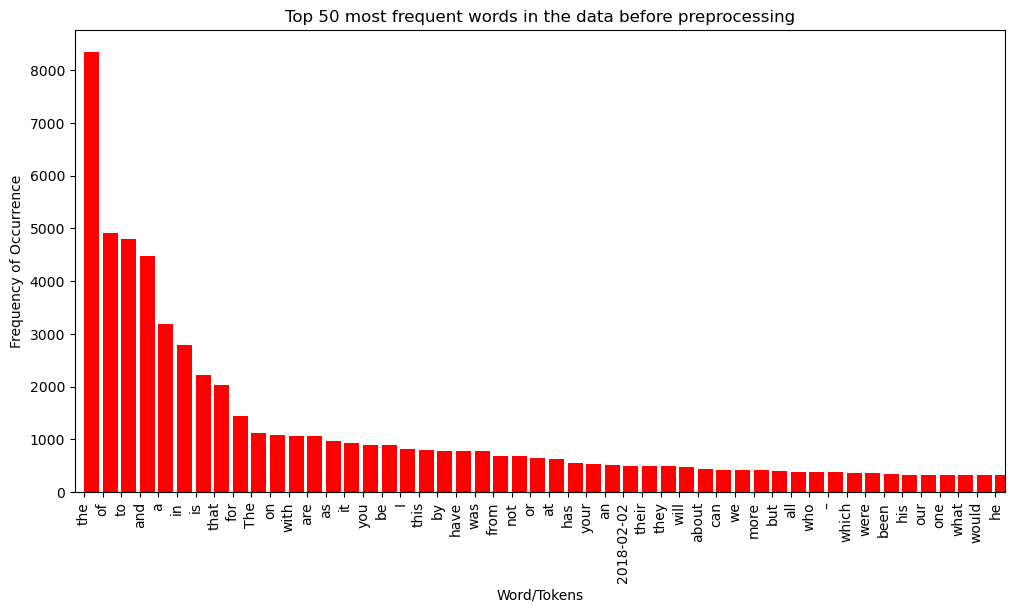

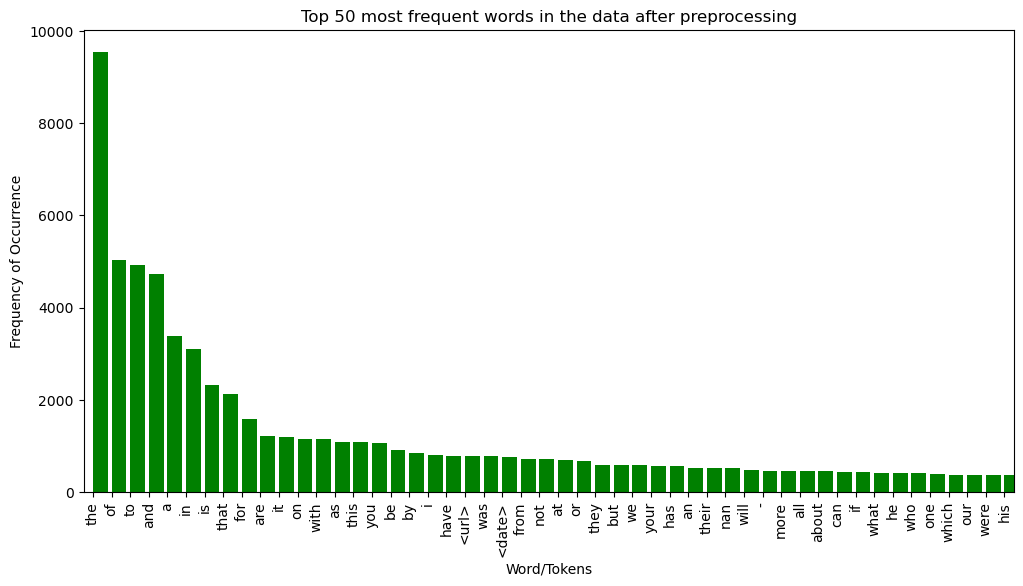

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

preData = 'https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv'
preDf = pd.read_csv(data) # Read the unprocessed data into a DataFrame
postDf = cleaner_text(df) # Read the processed data into a DataFrame

# concatenate all the text columns into a single series
preText_series = pd.concat([preDf[col] for col in preDf.columns], ignore_index=True)
postText_series = pd.concat([postDf[col] for col in postDf.columns], ignore_index=True)

# count the number of unique words
pre_words_int = preText_series.str.split().explode().nunique()
post_words_int = postText_series.str.split().explode().nunique()

# split the text into a series of words
pre_words = preText_series.str.split().explode()
post_words = postText_series.str.split().explode()

# Count the frequency of each word and 
def wordSignificance(word, df):
    word_counts = word.value_counts() # Count the frequency of each word
    # Calculate the significance of each word
    # By dividing the frequency of each word by the total number of words
    word_counts = word_counts / len(word)
    return word_counts

# A function to get the stopwords 
def topStopwords(wordSignificance, n):
    # Get the wwords that occur more than n% of the time
    stopword = wordSignificance[wordSignificance > n]
    stopword_list = stopword.index.tolist() # Convert the index to a list
    return stopword_list # Return the list of stopwords
topstopword_list = topStopwords(wordSignificance(post_words, postDf),0.005)
print(topstopword_list)

def botStopwords(wordSignificance, n):
    # Get the wwords that occur more than n% of the time
    stopword = wordSignificance[wordSignificance < n]
    stopword_list = stopword.index.tolist() # Convert the index to a list
    return stopword_list # Return the list of stopwords
botstopword_list = botStopwords(wordSignificance(post_words, postDf),0.00001)
# print(botstopword_list)

# A function to plot the top 50 most frequent words
def plot(words, title, colors):
    # count the frequency of each word
    word_counts = words.value_counts()

    # sort the list of words by frequency
    word_counts = word_counts.sort_values(ascending=False)

    # plot a bar chart of the 50 most frequent words
    top_words = word_counts[:50] # get the top 50 words
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(top_words.index, top_words.values, color=colors, width=0.8, align='edge')
    ax.set_xticks(range(len(top_words)))
    ax.set_xticklabels(top_words.index, rotation=90)
    ax.set_xlabel('Word/Tokens')
    ax.set_ylabel('Frequency of Occurrence')
    ax.set_xlim(-0.5, len(top_words) - 0.5) # add a gap at the beginning and end
    plt.title(title)
    plt.show()

print('\n### Unique words in the data before and after preprocessing ###')
print('Unique words before preprocessing: ', pre_words_int) # 31808
print('Unique words after preprocessing: ', post_words_int) # 26628
print('')
plot(pre_words, 'Top 50 most frequent words in the data before preprocessing', 'red')
plot(post_words, 'Top 50 most frequent words in the data after preprocessing', 'green')
